Name : Pradyumna PS,
Email ID : pradyumnaps193@gmail.com   

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [66]:
data = pd.read_csv("delivery_time.csv")

In [67]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [69]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

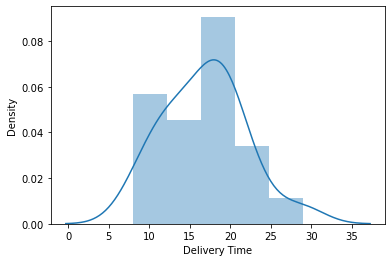

In [70]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

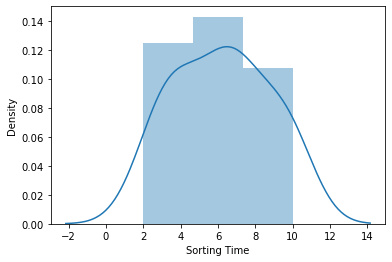

In [71]:
sns.distplot(data['Sorting Time'])

In [72]:
data = data.rename({"Delivery Time": "Delivery_time","Sorting Time":"Sorting_time"}, axis=1)
data.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

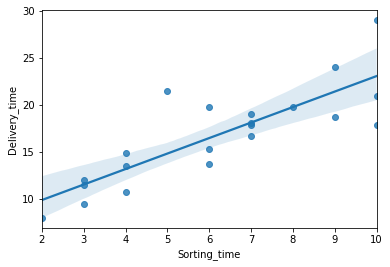

In [73]:
sns.regplot(x=data['Sorting_time'],y=data['Delivery_time'])

In [74]:
model = smf.ols("Delivery_time~Sorting_time",data=data).fit()

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        14:51:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [77]:
print(model.tvalues)
print(model.pvalues)

Intercept       3.823349
Sorting_time    6.387447
dtype: float64
Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [78]:
model.rsquared

0.6822714748417231

In [79]:
# Model Predictions
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [80]:
new_data = pd.Series([4,7])
new_data

0    4
1    7
dtype: int64

In [81]:
data_pred = pd.DataFrame(new_data,columns=["Sorting_time"])
data_pred

,Sorting_time
0,4
1,7


In [82]:
model.predict(data_pred)

0    13.178814
1    18.125873
dtype: float64

In [83]:
model1 = smf.ols("np.log(Delivery_time)~np.sqrt(Sorting_time)",data=data).fit()

In [84]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.748
Model:                               OLS   Adj. R-squared:                  0.735
Method:                    Least Squares   F-statistic:                     56.35
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           4.26e-07
Time:                           14:51:18   Log-Likelihood:                 9.2254
No. Observations:                     21   AIC:                            -14.45
Df Residuals:                         19   BIC:                            -12.36
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.5195      0.171      8.886      0.000       1.162       1.877
np.sqrt(Sorting_time)     0.5159      0.069      7.506      0.000       0.372       0.660
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.026
Skew:                           0.541   Prob(JB):                        0.599
Kurtosis:                       3.019   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model1.params

Intercept                1.519523
np.sqrt(Sorting_time)    0.515931
dtype: float64

In [86]:
print(model1.tvalues)
print(model1.pvalues)

Intercept                8.885685
np.sqrt(Sorting_time)    7.506487
dtype: float64
Intercept                3.405729e-08
np.sqrt(Sorting_time)    4.258181e-07
dtype: float64


In [87]:
model1.rsquared

0.747834543427237

In [88]:
model2 = smf.ols("np.log(Delivery_time)~(Sorting_time)",data=data).fit()

In [89]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           14:51:19   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model2.params

Intercept       2.121372
Sorting_time    0.105552
dtype: float64

In [91]:
print(model2.pvalues)
print(model2.tvalues)

Intercept       1.857343e-14
Sorting_time    1.592708e-06
dtype: float64
Intercept       20.601357
Sorting_time     6.836088
dtype: float64


In [92]:
model2.rsquared

0.7109478980584187

In [94]:
data["Sorting_time_sq"] = data.Sorting_time**2

In [105]:
model3 = smf.ols("np.log(Delivery_time)~np.log(Sorting_time_sq+Sorting_time)",data=data).fit()

In [106]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.769
Model:                               OLS   Adj. R-squared:                  0.757
Method:                    Least Squares   F-statistic:                     63.34
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.81e-07
Time:                           14:56:39   Log-Likelihood:                 10.157
No. Observations:                     21   AIC:                            -16.31
Df Residuals:                         19   BIC:                            -14.23
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.5875      0.153     10.372      0.000       1.267       1.908
np.log(Sorting_time_sq + Sorting_time)     0.3267      0.041      7.959      0.000       0.241       0.413
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.194
Skew:                           0.583   Prob(JB):                        0.551
Kurtosis:                       2.930   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
model3.params

Intercept                                 1.587528
np.log(Sorting_time_sq + Sorting_time)    0.326653
dtype: float64

In [111]:
print(model3.pvalues)
print(model3.tvalues)

Intercept                                 2.911894e-09
np.log(Sorting_time_sq + Sorting_time)    1.810237e-07
dtype: float64
Intercept                                 10.372221
np.log(Sorting_time_sq + Sorting_time)     7.958548
dtype: float64


In [112]:
model3.rsquared

0.7692451915083323